In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
import datetime


In [6]:
#import copy of FIFA23 - MAIN.csv data set from data folder
fifa23 = pd.read_csv('/workspaces/siads593-M1/data/Copy of FIFA23 - MAIN.csv')

In [7]:
fifa23.head()

,ID,PlayerName,Rating,Club,Nation,NationTop,Card,League,LeagueTop,SkillMoves,...,GK_Kicking,GK_REFLEXES,GK_Reflexes,GK_SPEED,GK_Acceleration,GK_SprintSpeed,GK_POSITIONING,GK_Positioning,isGK,PlayerURL
0,1,Pelé,98,FUT ICONS,Brazil,Brazil,fut23 icon gold rare,ICN,ICN,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,https://www.futbin.com/23/player/62
1,2,Ronaldo,96,FUT ICONS,Brazil,Brazil,fut23 icon gold rare,ICN,ICN,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,https://www.futbin.com/23/player/265
2,3,Zinedine Zidane,96,FUT ICONS,France,France,fut23 icon gold rare,ICN,ICN,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,https://www.futbin.com/23/player/303
3,4,Pelé,96,FUT ICONS,Brazil,Brazil,fut23 wc icon gold rare,ICN,ICN,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,https://www.futbin.com/23/player/50235
4,5,Pelé,95,FUT ICONS,Brazil,Brazil,fut23 icon gold rare,ICN,ICN,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,https://www.futbin.com/23/player/63


In [8]:
# Standardize column names by converting to lowercase and removing leading/trailing whitespaces
standardized_columns = fifa23.columns.str.lower().str.strip()

# Check for duplicate columns after standardization
duplicate_columns = standardized_columns[standardized_columns.duplicated(keep=False)].sort_values()

# Display the duplicate columns, if any
duplicate_columns.unique() if duplicate_columns.any() else "No duplicate columns found after standardization"


Index(['gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [12]:
# Identify the original column names that correspond to the standardized duplicate column names
original_duplicate_columns = [col for col in fifa23.columns if col.lower().strip() in duplicate_columns]

# Group the original duplicate columns by their standardized names for comparison
grouped_duplicate_columns = {}
for standardized_name in duplicate_columns.unique():
    grouped_duplicate_columns[standardized_name] = [col for col in original_duplicate_columns if col.lower().strip() == standardized_name]

# Initialize a dictionary to store the examination results
examination_results = {}

# Examine each set of duplicate columns
for standardized_name, original_names in grouped_duplicate_columns.items():
    # Initialize a dictionary to store results for this set of duplicate columns
    examination_results[standardized_name] = {}
    
    # 1. Compare Value Counts
    value_counts_comparison = pd.DataFrame({name: fifa23[name].value_counts() for name in original_names})
    examination_results[standardized_name]['Value Counts'] = value_counts_comparison
    
    # 2. Check for NaNs
    nan_counts_comparison = pd.DataFrame({name: [fifa23[name].isna().sum()] for name in original_names}, index=['NaN Count'])
    examination_results[standardized_name]['NaN Counts'] = nan_counts_comparison
    
    # 3. Sample Comparison for rows where values differ
    differing_rows = fifa23[original_names].apply(lambda row: len(row.dropna().unique()) > 1, axis=1)
    sample_differing_rows = fifa23.loc[differing_rows, original_names].sample(min(5, differing_rows.sum()), random_state=42)
    examination_results[standardized_name]['Sample Differing Rows'] = sample_differing_rows

# Display the examination results
examination_results


{'gk_diving': {'Value Counts':       GK_DIVING  GK_Diving
  62.0        104        104
  64.0        104        104
  65.0        100        100
  68.0         93         93
  67.0         92         92
  63.0         86         86
  70.0         85         85
  66.0         81         81
  59.0         77         77
  60.0         74         74
  69.0         74         74
  61.0         73         73
  71.0         73         73
  72.0         66         66
  58.0         60         60
  74.0         52         52
  73.0         50         50
  75.0         48         48
  55.0         47         47
  78.0         45         45
  56.0         41         41
  76.0         39         39
  57.0         38         38
  77.0         37         37
  79.0         35         35
  80.0         27         27
  54.0         27         27
  82.0         26         26
  51.0         22         22
  53.0         22         22
  84.0         21         21
  81.0         21         21
  83.0        

In [14]:
# Drop the duplicate columns, keeping the first occurrence of each
columns_to_drop = [original_names[1:] for original_names in grouped_duplicate_columns.values()]
columns_to_drop = [col for sublist in columns_to_drop for col in sublist]  # Flatten the list

# Drop the identified columns
df_clean = fifa23.drop(columns=columns_to_drop)

# Display the first few rows of the cleaned DataFrame and its shape
df_clean.head(), df_clean.shape



(   ID       PlayerName  Rating       Club  Nation NationTop  \
 0   1             Pelé      98  FUT ICONS  Brazil    Brazil   
 1   2          Ronaldo      96  FUT ICONS  Brazil    Brazil   
 2   3  Zinedine Zidane      96  FUT ICONS  France    France   
 3   4             Pelé      96  FUT ICONS  Brazil    Brazil   
 4   5             Pelé      95  FUT ICONS  Brazil    Brazil   
 
                       Card League LeagueTop  SkillMoves  ...  GK_DIVING  \
 0     fut23 icon gold rare    ICN       ICN           5  ...        NaN   
 1     fut23 icon gold rare    ICN       ICN           5  ...        NaN   
 2     fut23 icon gold rare    ICN       ICN           5  ...        NaN   
 3  fut23 wc icon gold rare    ICN       ICN           5  ...        NaN   
 4     fut23 icon gold rare    ICN       ICN           5  ...        NaN   
 
   GK_HANDLING GK_KICKING GK_REFLEXES GK_SPEED  GK_Acceleration  \
 0         NaN        NaN         NaN      NaN              NaN   
 1         NaN        

%md
The missing values in the dataset are primarily concentrated in columns related to goalkeepers:

- GK_DIVING: 16,159 missing values (approximately 89.18%)
- GK_POSITIONING: 16,159 missing values (approximately 89.18%)
- GK_SprintSpeed: 16,159 missing values (approximately 89.18%)
- GK_Acceleration: 16,159 missing values (approximately 89.18%)
- GK_SPEED: 16,159 missing values (approximately 89.18%)
- GK_REFLEXES: 16,159 missing values (approximately 89.18%)
- GK_KICKING: 16,159 missing values (approximately 89.18%)
- GK_HANDLING: 16,159 missing values (approximately 89.18%)

In [19]:
# Create two different DataFrames: one for goalkeepers and one for outfield players
df_goalkeepers = df_clean[df_clean['isGK'] == True]
df_outfield = df_clean[df_clean['isGK'] == False]

# Drop columns with null values in the DataFrame for outfield players
df_outfield_clean = df_outfield.dropna(axis=1, how='any')

# Show the shape of the original DataFrame, the goalkeeper DataFrame, and the outfield DataFrame
original_shape = df_clean.shape
goalkeepers_shape = df_goalkeepers.shape
outfield_shape = df_outfield_clean.shape

original_shape, goalkeepers_shape, outfield_shape

((18119, 71), (1960, 71), (16159, 63))

In [20]:
df_goalkeepers.describe()

,ID,Rating,SkillMoves,WeakFoot,HeightCm,HeightIn,WeightKg,WeightLb,Popularity,IGS_base,...,Strength,Aggression,GK_DIVING,GK_HANDLING,GK_KICKING,GK_REFLEXES,GK_SPEED,GK_Acceleration,GK_SprintSpeed,GK_POSITIONING
count,1960.000000,1960.000000,1960.000000,1960.000000,1960.000000,1960.000000,1960.000000,1960.000000,1960.000000,1960.000000,...,1960.000000,1960.000000,1960.000000,1960.000000,1960.000000,1960.000000,1960.000000,1960.000000,1960.000000,1960.000000
mean,10098.451531,66.407653,1.002041,2.539286,189.000000,74.421939,81.918878,180.569388,11.998980,365.889796,...,60.493367,25.883673,66.871939,64.616837,63.487755,67.886735,37.841327,37.793367,37.920408,65.198469
std,5473.366809,8.653304,0.063871,0.696001,4.672752,1.873495,6.368475,14.026275,88.782819,47.919322,...,11.001924,7.280898,8.555940,8.179059,8.104212,8.982907,10.979066,11.518352,11.141752,9.240030
min,10.000000,46.000000,1.000000,1.000000,170.000000,67.000000,0.000000,0.000000,-148.000000,252.000000,...,25.000000,10.000000,42.000000,42.000000,38.000000,45.000000,15.000000,14.000000,15.000000,39.000000
25%,5105.500000,60.000000,1.000000,2.000000,186.000000,73.000000,78.000000,172.000000,0.000000,333.000000,...,54.000000,20.000000,61.000000,59.000000,58.000000,62.000000,29.000000,29.000000,29.000000,59.000000
50%,10467.500000,66.000000,1.000000,3.000000,189.000000,74.000000,82.000000,181.000000,1.000000,363.000000,...,62.000000,25.000000,66.000000,64.000000,63.000000,67.000000,38.000000,38.000000,39.000000,65.000000
75%,15217.750000,72.000000,1.000000,3.000000,192.000000,76.000000,86.000000,190.000000,2.000000,398.000000,...,68.000000,30.000000,72.000000,70.000000,69.000000,74.000000,46.000000,46.000000,46.000000,71.000000
max,18119.000000,94.000000,3.000000,5.000000,206.000000,81.000000,105.000000,231.000000,2866.000000,521.000000,...,85.000000,61.000000,95.000000,90.000000,93.000000,96.000000,86.000000,89.000000,81.000000,95.000000


In [21]:
df_outfield_clean.describe()

,ID,Rating,SkillMoves,WeakFoot,HeightCm,HeightIn,WeightKg,WeightLb,Popularity,IGS_base,...,Interceptions,HeadingAccuracy,DefAwareness,StandingTackle,SlidingTackle,PHY,Jumping,Stamina,Strength,Aggression
count,16159.000000,16159.000000,16159.000000,16159.000000,16159.000000,16159.000000,16159.000000,16159.000000,16159.000000,16159.000000,...,16159.000000,16159.000000,16159.000000,16159.000000,16159.000000,16159.000000,16159.000000,16159.000000,16159.000000,16159.000000
mean,8935.159354,68.400705,2.628752,3.061514,180.859769,71.214060,74.547744,164.355777,47.019556,370.749551,...,52.570827,58.697011,52.674361,54.250696,51.596881,66.978897,67.524537,69.574107,67.709635,61.634693
std,5186.526764,8.393300,0.697984,0.683785,6.506361,2.556365,6.796090,14.973607,278.818373,47.192725,...,18.863194,12.698715,17.793305,18.773807,18.802233,10.075989,12.480270,11.818110,12.770188,14.014321
min,1.000000,46.000000,2.000000,1.000000,156.000000,61.000000,0.000000,0.000000,-2648.000000,0.000000,...,10.000000,21.000000,10.000000,10.000000,10.000000,30.000000,29.000000,28.000000,27.000000,20.000000
25%,4464.500000,63.000000,2.000000,3.000000,176.000000,69.000000,70.000000,154.000000,0.000000,339.000000,...,38.000000,50.000000,39.000000,39.000000,36.000000,61.000000,60.000000,62.000000,60.000000,53.000000
50%,8919.000000,67.000000,3.000000,3.000000,181.000000,71.000000,74.000000,163.000000,1.000000,368.000000,...,58.000000,58.000000,57.000000,60.000000,57.000000,68.000000,69.000000,70.000000,69.000000,63.000000
75%,13370.500000,73.000000,3.000000,3.000000,185.000000,73.000000,79.000000,174.000000,4.000000,400.000000,...,66.000000,67.000000,66.000000,68.000000,65.000000,74.000000,76.000000,78.000000,77.000000,72.000000
max,18120.000000,98.000000,5.000000,5.000000,206.000000,81.000000,102.000000,225.000000,7813.000000,529.000000,...,96.000000,99.000000,95.000000,97.000000,99.000000,95.000000,99.000000,99.000000,99.000000,99.000000


In [16]:
# show nique values in FUT ICONS
df_clean['Club'].unique()

array(['FUT ICONS', 'Paris SG', 'FC Barcelona', 'Manchester City',
       'FC Bayern', 'Liverpool', 'HERO', 'Real Madrid', 'Chelsea',
       'Manchester Utd', 'Poland', 'Argentina', 'France', 'Belgium',
       'RB Leipzig', 'Spurs', 'LAFC', 'Milan', 'Salernitana',
       'Netherlands', 'Portugal', 'Germany', 'Sevilla FC', 'Inter',
       'Dortmund', 'Atlético de Madrid', 'Ajax', 'Brazil', 'South Korea',
       'England', 'Senegal', 'Fulham', 'SS Lazio', 'Newcastle Utd',
       'Uruguay', 'Roma FC', 'Arsenal', 'Villarreal CF', 'Inter Miami CF',
       'Frankfurt', 'Juventus', 'Costa Rica', 'Croatia', 'Angers SCO',
       'Leicester City', 'Napoli', 'Leverkusen', 'West Ham', 'PSV',
       'SL Benfica', 'Real Betis', 'Toronto FC', 'OM', 'Galatasaray',
       'TSG Hoffenheim', 'Spain', 'Aston Villa', 'Real Sociedad',
       'Rennes', 'Stade de Reims', 'AS Monaco', 'FC Nantes', 'Fiorentina',
       'OL', 'Crystal Palace', 'Rayo Vallecano', 'Union Berlin', 'QPR',
       'RC Lens', 'OGC Nice'

## Numerical colummn analasis
#### Distribution Analysis
[]. need to carefully id var types and redo

/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

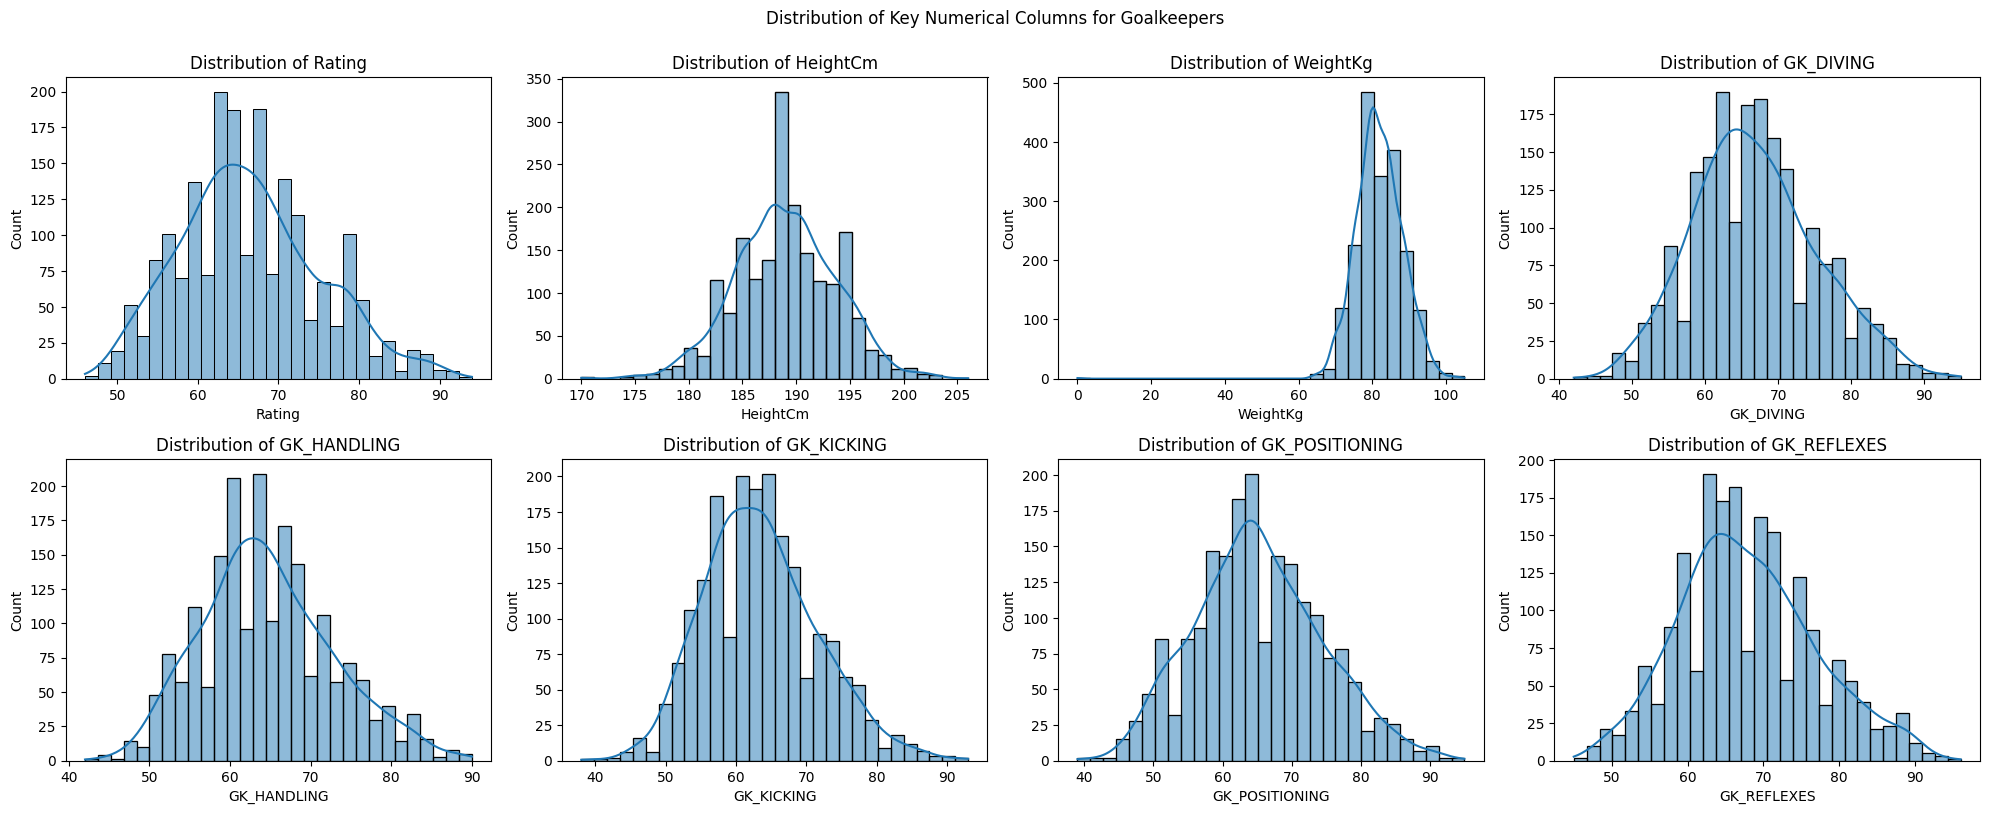

/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

KeyError: 'Shooting'

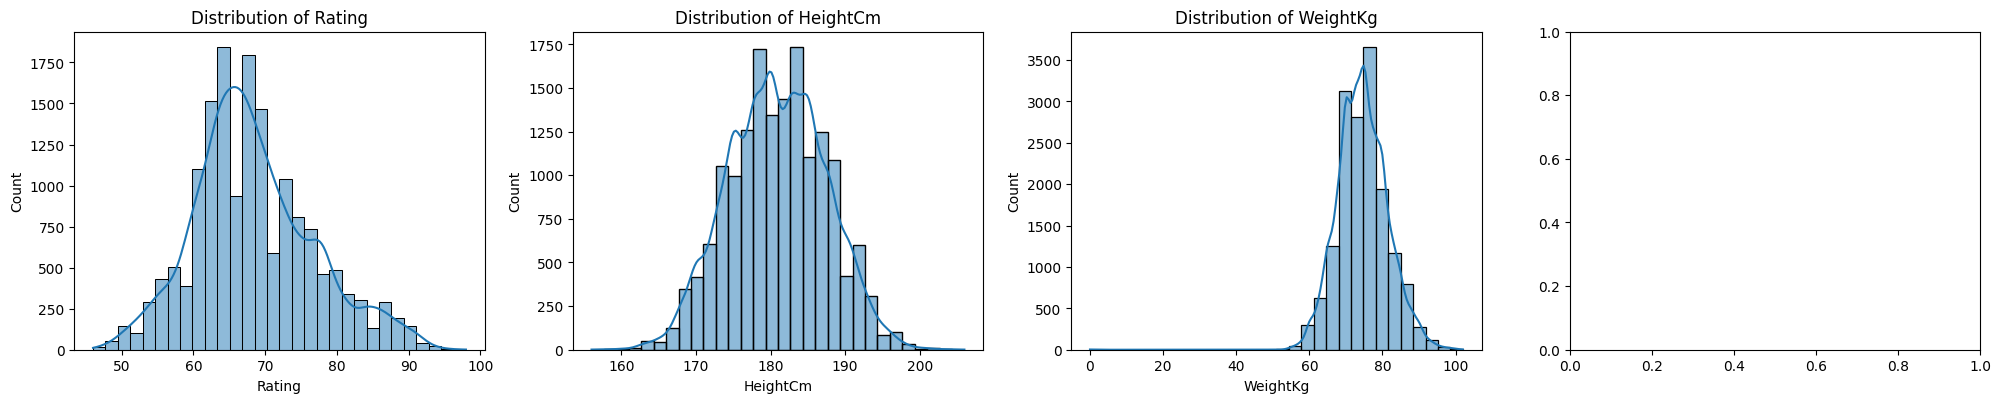

In [26]:
# Function to plot distribution for numerical columns
def plot_distribution(df, columns, title):
    plt.figure(figsize=(20, 15))
    for i, col in enumerate(columns, 1):
        plt.subplot(4, 4, i)
        sns.histplot(df[col], kde=True, bins=30)
        plt.title(f'Distribution of {col}')
        plt.tight_layout()
    plt.suptitle(title, y=1.02)
    plt.show()

# Select a subset of key numerical columns for distribution analysis
key_goalkeeper_columns = ['Rating', 'HeightCm', 'WeightKg', 'GK_DIVING', 'GK_HANDLING', 'GK_KICKING', 'GK_POSITIONING', 'GK_REFLEXES']
key_outfield_columns = ['Rating', 'HeightCm', 'WeightKg', 'Shooting', 'Passing', 'Dribbling', 'Defending']

# Plot distribution for key numerical columns in goalkeepers DataFrame
plot_distribution(df_goalkeepers, key_goalkeeper_columns, 'Distribution of Key Numerical Columns for Goalkeepers')

# Plot distribution for key numerical columns in outfield players DataFrame
plot_distribution(df_outfield_clean, key_outfield_columns, 'Distribution of Key Numerical Columns for Outfield Players')


#### Correlation Analysis

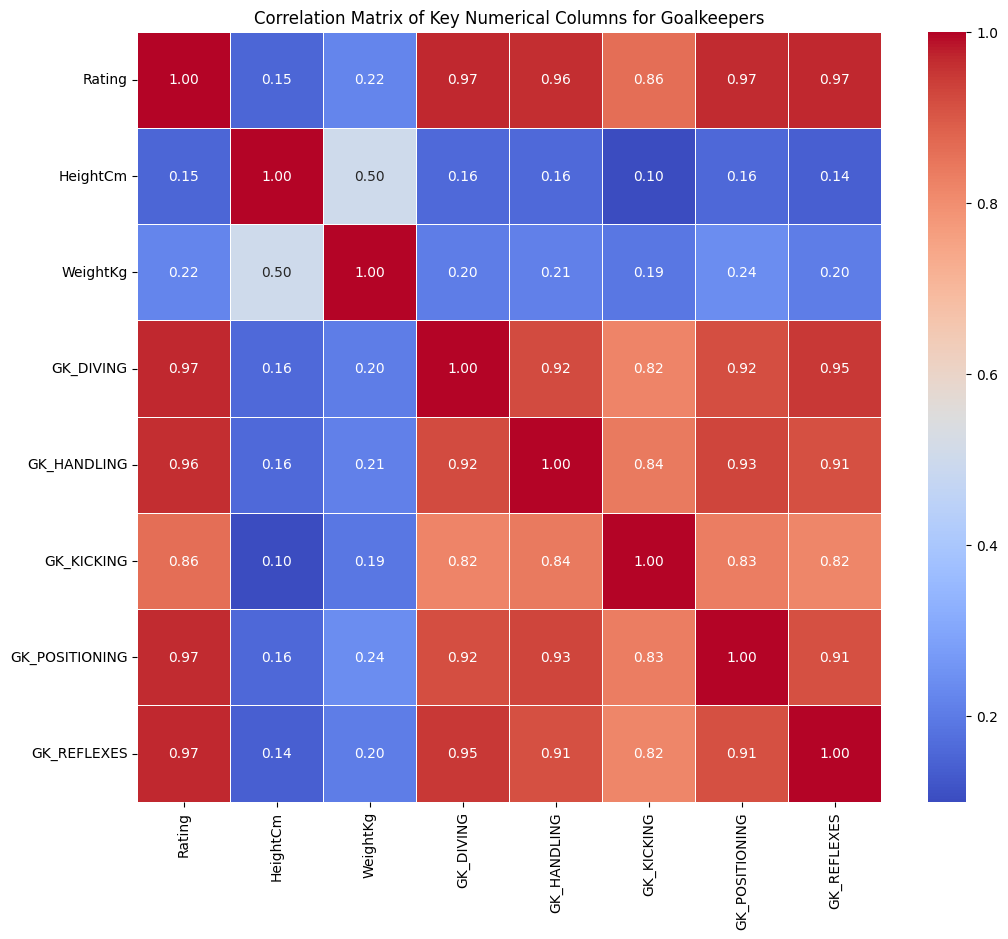

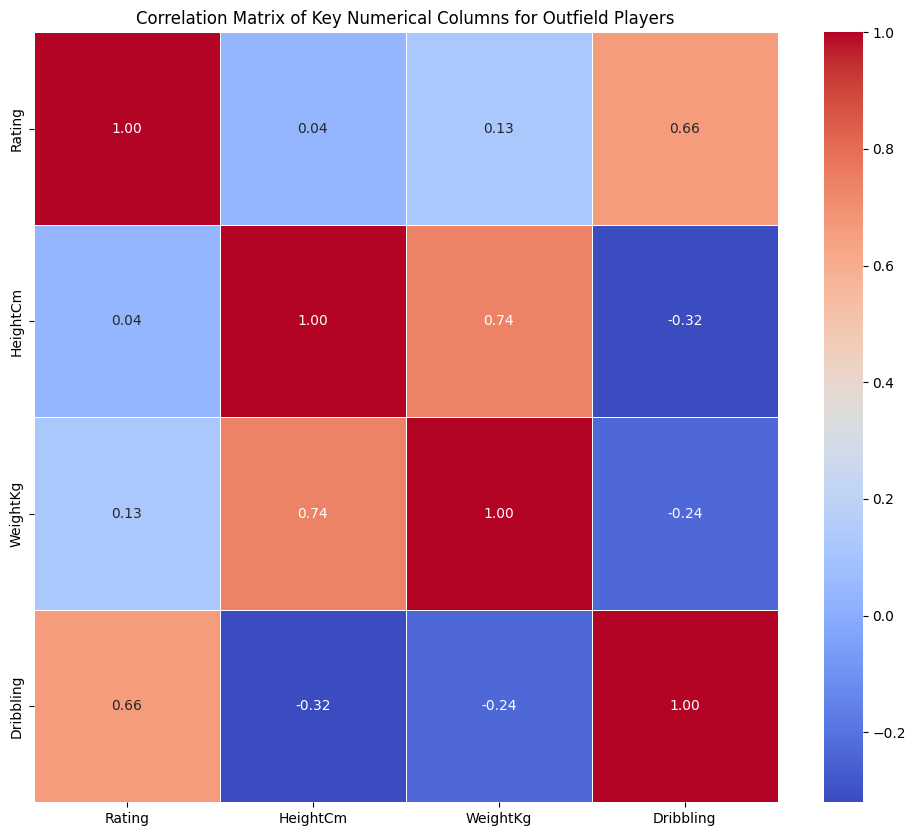

In [25]:
# Function to plot correlation heatmap for numerical columns
def plot_correlation(df, columns, title):
    correlation_matrix = df[columns].corr()
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title(title)
    plt.show()

# Plot correlation heatmap for key numerical columns in goalkeepers DataFrame
plot_correlation(df_goalkeepers, key_goalkeeper_columns, 'Correlation Matrix of Key Numerical Columns for Goalkeepers')

# Plot correlation heatmap for key numerical columns in outfield players DataFrame
plot_correlation(df_outfield_clean, key_outfield_columns, 'Correlation Matrix of Key Numerical Columns for Outfield Players')


In [27]:
from sklearn.ensemble import IsolationForest

# Function to identify outliers using Isolation Forest algorithm
def isolation_forest_outliers(df, columns):
    iso_forest = IsolationForest(contamination=0.05)
    df_subset = df[columns].dropna()
    iso_forest.fit(df_subset)
    outlier_pred = iso_forest.predict(df_subset)
    outlier_indices = df_subset.index[outlier_pred == -1].tolist()
    return outlier_indices

# Identify outliers in goalkeepers DataFrame using Isolation Forest for key numerical columns
goalkeeper_outliers_iso = isolation_forest_outliers(df_goalkeepers, key_goalkeeper_columns)

# Identify outliers in outfield players DataFrame using Isolation Forest for key numerical columns
outfield_outliers_iso = isolation_forest_outliers(df_outfield_clean, key_outfield_columns)

# Count of unique outliers identified by Isolation Forest
goalkeeper_outliers_iso_count = len(set(goalkeeper_outliers_iso))
outfield_outliers_iso_count = len(set(outfield_outliers_iso))

goalkeeper_outliers_iso_count, outfield_outliers_iso_count


KeyError: "['Shooting', 'Passing', 'Defending'] not in index"

AttributeError: 'list' object has no attribute 'columns'

In [30]:
from scipy.stats import ttest_ind

# Conduct a t-test to compare the mean ratings between goalkeepers and outfield players
goalkeeper_ratings = df_goalkeepers['Rating'].dropna()
outfield_ratings = df_outfield_clean['Rating'].dropna()

# Perform the t-test
t_stat, p_value = ttest_ind(goalkeeper_ratings, outfield_ratings)

# Interpret the results
significance_level = 0.05  # 5% significance level
is_significant = p_value < significance_level

t_stat, p_value, is_significant


(-9.894227515824637, 5.0446674765858525e-23, True)

## Cat vars

In [31]:
# Identify all categorical columns in the outfield players DataFrame
outfield_categorical_columns = df_outfield_clean.select_dtypes(include=['object']).columns

# Display the categorical columns
outfield_categorical_columns


Index(['PlayerName', 'Club', 'Nation', 'NationTop', 'Card', 'League',
       'LeagueTop', 'StrongFoot', 'Position', 'WorkRateAtk', 'WorkRateDef',
       'BodyType', 'DOB', 'DateAdded', 'PlayerURL'],
      dtype='object')

/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

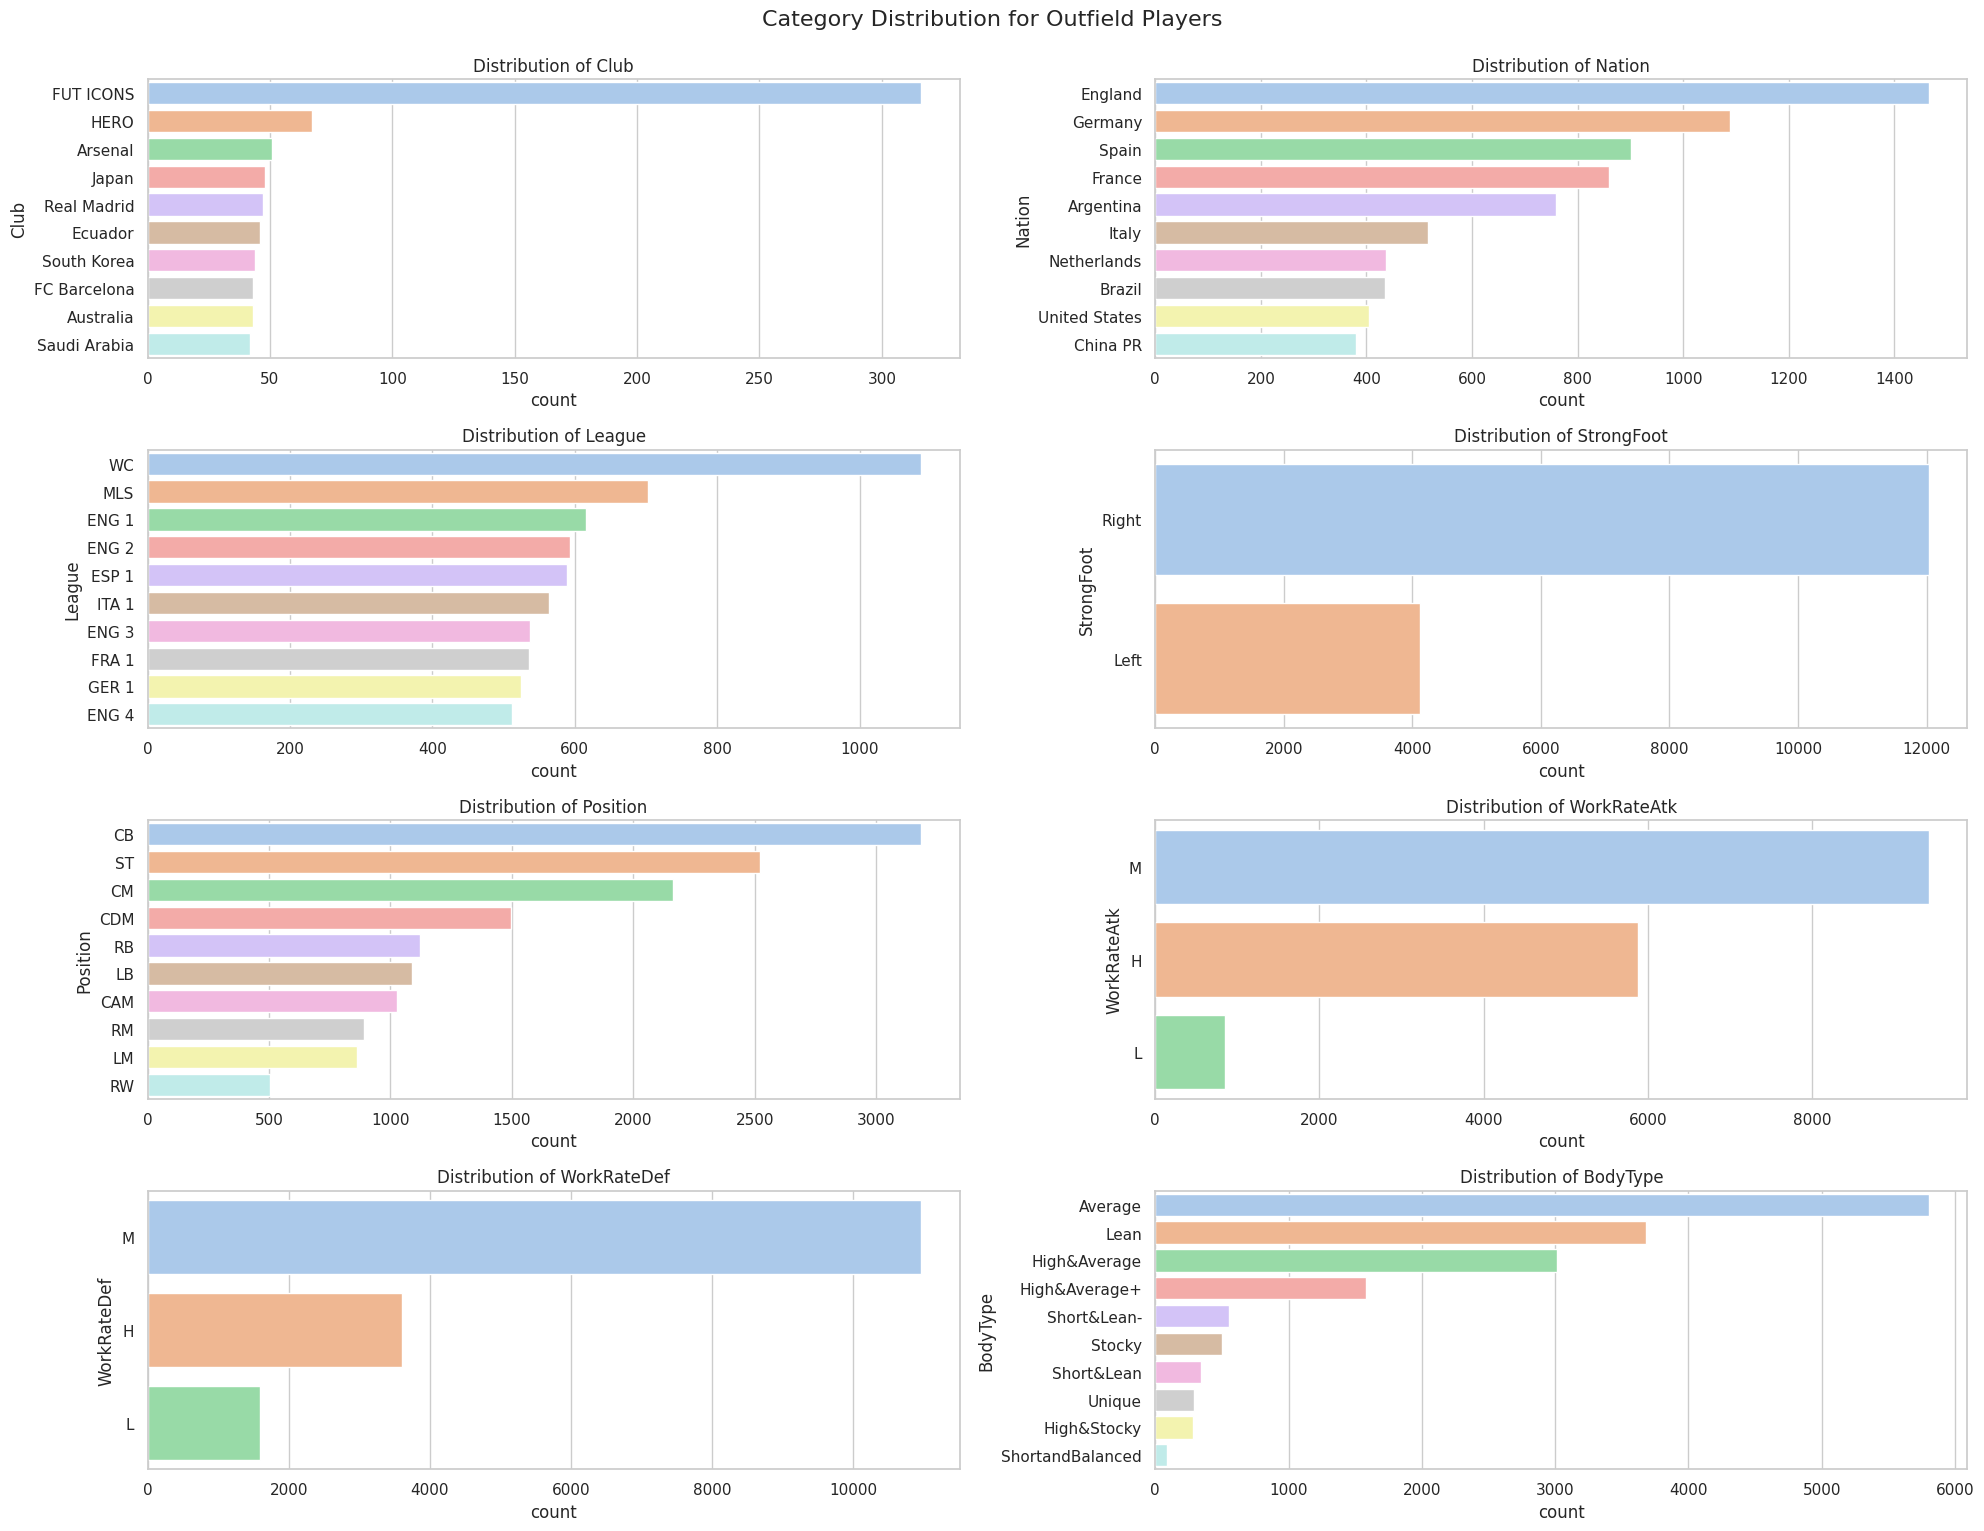

In [36]:
# Select key categorical columns for outfield players DataFrame for more in-depth analysis
key_outfield_categorical_columns = ['Club', 'Nation', 'League', 'StrongFoot', 'Position', 'WorkRateAtk', 'WorkRateDef', 'BodyType']

# Plot category distribution for key categorical columns in outfield players DataFrame
plot_category_distribution(df_outfield_clean, key_outfield_categorical_columns, 'Category Distribution for Outfield Players')


/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

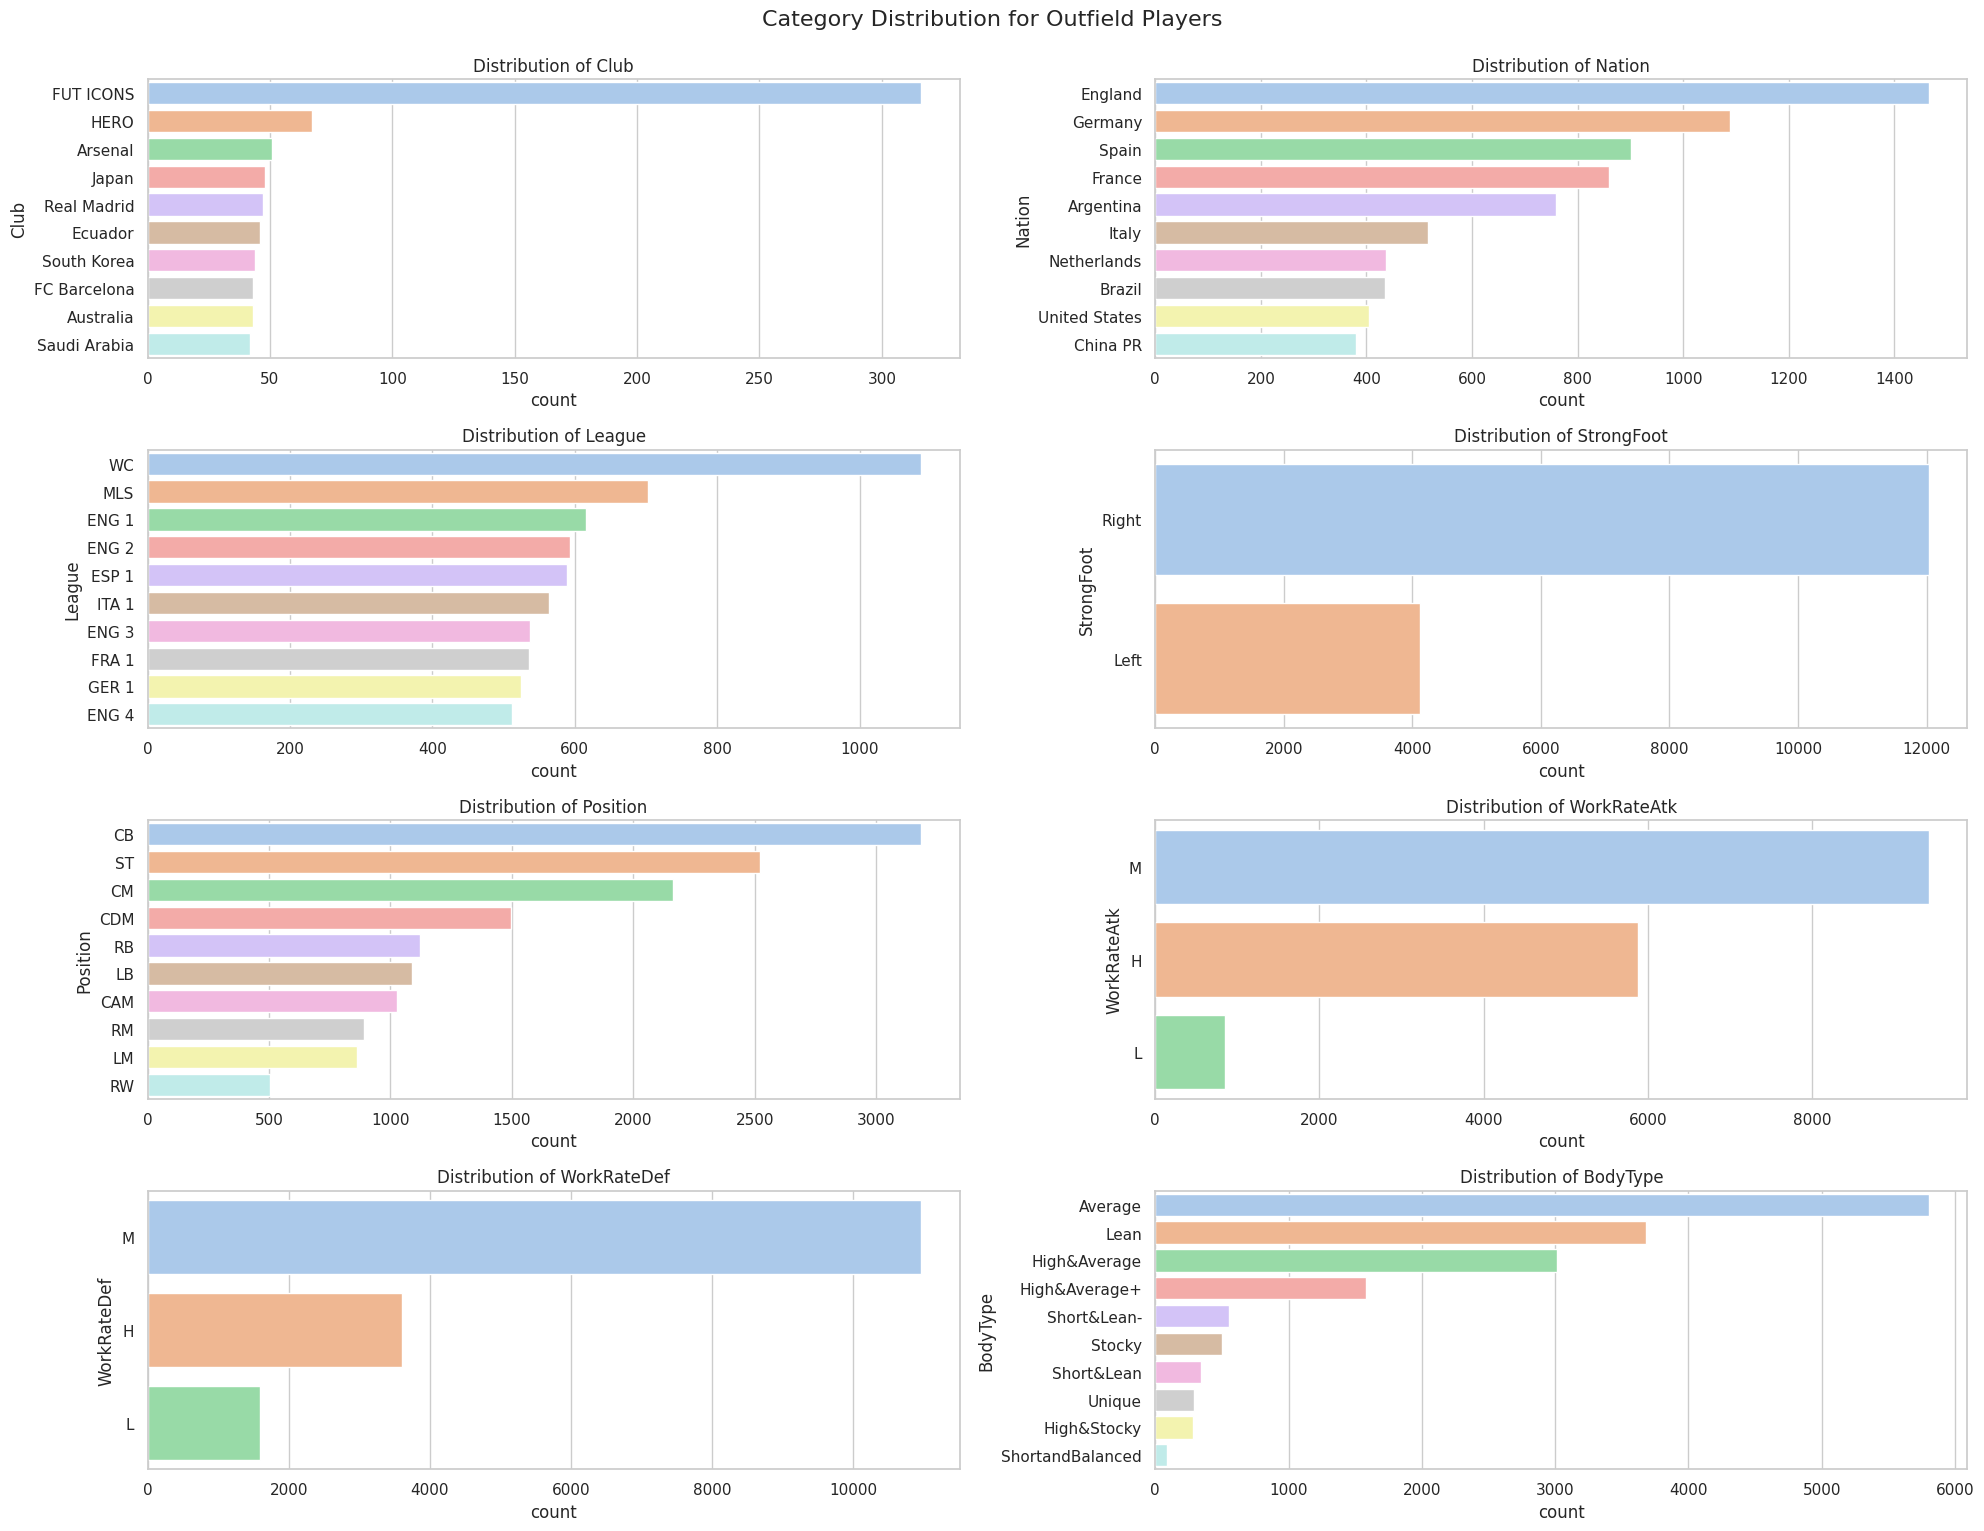

In [35]:
# Redefining the function to plot category distribution for categorical columns
def plot_category_distribution(df, columns, title):
    plt.figure(figsize=(20, 15))
    sns.set(style="whitegrid")
    sns.set_palette("pastel")
    
    for i, col in enumerate(columns, 1):
        plt.subplot(4, 2, i)
        if df[col].nunique() > 10:  # Limit categories for high cardinality columns
            sns.countplot(data=df, y=col, order=df[col].value_counts().iloc[:10].index)
        else:
            sns.countplot(data=df, y=col, order=df[col].value_counts().index)
        plt.title(f'Distribution of {col}')
        plt.tight_layout()
    plt.suptitle(title, y=1.02, fontsize=16)
    plt.show()

# Plot category distribution for key categorical columns in outfield players DataFrame
plot_category_distribution(df_outfield_clean, key_outfield_categorical_columns, 'Category Distribution for Outfield Players')
